# MPT Core Length Comparison

In [1]:
import pyleoclim as pyleo
import numpy as np
import ammonyte as ammo
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.transforms as transforms

from pangaeapy.pandataset import PanDataSet
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches

In [2]:
#We suppress warnings for these notebooks for presentation purposes. Best practice is to not do this though.
import warnings
warnings.filterwarnings('ignore')

Time axis values sorted in ascending order
Initial density is 0.0069
Initial density is not within the tolerance window, searching...
Epsilon: 1.4307, Density: 0.0236
Epsilon: 1.6948, Density: 0.0576
Epsilon: 1.6948, Density: 0.0576.


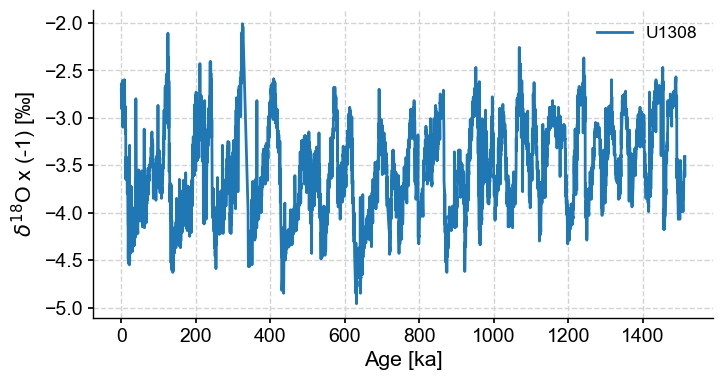

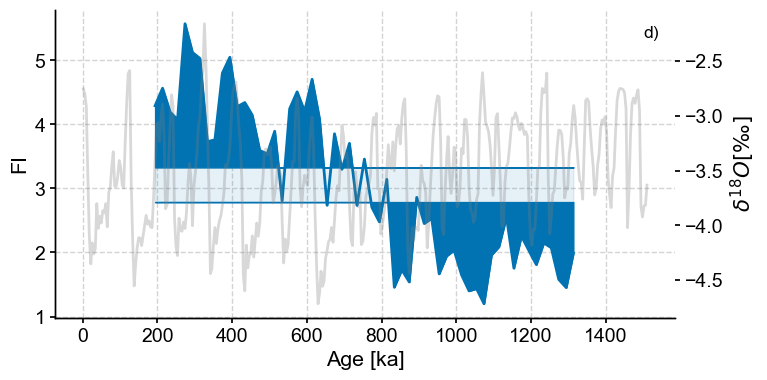

In [3]:
dsb = PanDataSet('10.1594/PANGAEA.831735')
tsb = pyleo.Series(time=dsb.data['Age'], value=dsb.data['C. wuellerstorfi δ18O'],
                      time_name='Age', time_unit='ka BP', label = 'U1308',
                      value_name='$\delta^{18}$O', value_unit=u'‰').flip()
tsb.plot(figsize=(8,4))

series = tsb.interp().bin(bin_size=4).convert_time_unit('Years')
series_lp = series.convert_time_unit('ka')

amt_series = ammo.Series(
    time=series.time,
    value=series.value,
    time_name = series.time_name,
    value_name = series.value_name,
    time_unit = series.time_unit,
    value_unit = series.value_unit,
    label = series.label,
    clean_ts=False,
    sort_ts=None
)
td = amt_series.embed(15)
eps = td.find_epsilon(1)
rm = eps['Output']
lp_series = rm.laplacian_eigenmaps(50,5)
lp_series = lp_series.convert_time_unit('ka')

fig,ax = plt.subplots(figsize=(8,4))
lp_series.confidence_fill_plot(ax=ax,title=None,legend=False)
ax.set_ylabel('FI')
ax_twin = ax.twinx()
series_lp.plot(ax=ax_twin,color='grey',alpha=.3,legend=False)
ax_twin.set_ylabel(r'$\delta^{18}O [‰]$')
ax_twin.grid(False)
patch = mpatches.Patch(fc="w", fill=False, edgecolor='none', linewidth=0,label='d)')
ax.legend(handles=[patch],loc='upper right')

# LR04 Core MPT Timing (Full)

In [4]:
#Defining group lists for easy loading
group_names = ['ODP 925','ODP 927','ODP 929','ODP 846','ODP 849']

series_list = []
color_list = sns.color_palette('colorblind')

for name in group_names:
    with open('./data/LR04cores_spec_corr/'+name[-3:]+'_LR04age.txt','rb') as handle:
        lines = handle.readlines()
        time = []
        d18O = []
        for x in lines:
            line_time = float(format(float(x.decode().split()[1]),'10f'))
            line_d18O = float(format(float(x.decode().split()[2]),'10f'))
            #There is a discontinuity in 927 around 4000 ka, we'll just exclude it
            if line_time <= 4000:
                time.append(line_time)
                d18O.append(line_d18O)
        series = pyleo.Series(value=d18O,
                              time=time,
                              label=name,
                              time_name='Yr',
                              time_unit='ka',
                              value_name=r'$\delta^{18}O$',
                              value_unit='permil')
    series_list.append(series)
    
max_time = min([max(series.time) for series in series_list])
min_time = max([min(series.time) for series in series_list])

ms = pyleo.MultipleSeries([series.slice((min_time,max_time)).interp() for series in series_list])
fig,ax = ms.stackplot(colors=color_list[:len(ms.series_list)],figsize=(8,10))

FileNotFoundError: [Errno 2] No such file or directory: './data/LR04cores_spec_corr/925_LR04age.txt'

In [4]:
lp_rm = {}
lp_fi = {}

m = 13
tau = 8

for idx,series in enumerate(ms.series_list):
    series = series.convert_time_unit('Years').interp().detrend(method='savitzky-golay')
    amt_series = ammo.Series(
        time=series.time,
        value=series.value,
        time_name = series.time_name,
        value_name = series.value_name,
        time_unit = series.time_unit,
        value_unit = series.value_unit,
        label = series.label,
        clean_ts=False,
        sort_ts=None
    )
    td = amt_series.embed(m=m)
    print(f'{series.label} tau is: {td.tau}')
    eps = td.find_epsilon(eps=1,target_density=.05,tolerance=.01)
    rm = eps['Output']
    lp_series = rm.laplacian_eigenmaps(w_size=50,w_incre=5)
    lp_series = lp_series.convert_time_unit('ka')
    lp_fi[series.label] = lp_series

/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_27044/2294287704.py:9: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  amt_series = ammo.Series(


ODP 925 tau is: 7
Initial density is 0.0181
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0181
Epsilon: 1.1593, Density: 0.0496
Epsilon: 1.1593, Density: 0.0496.


/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: No time_name parameter provided. Assuming "Time".
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_27044/2294287704.py:9: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  amt_series = ammo.Series(


ODP 927 tau is: 4
Initial density is 0.0227
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0227
Epsilon: 1.1363, Density: 0.0507
Epsilon: 1.1363, Density: 0.0507.


/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: No time_name parameter provided. Assuming "Time".
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_27044/2294287704.py:9: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  amt_series = ammo.Series(


ODP 929 tau is: 5
Initial density is 0.0259
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0259
Epsilon: 1.1206, Density: 0.0544
Epsilon: 1.1206, Density: 0.0544.


/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: No time_name parameter provided. Assuming "Time".
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_27044/2294287704.py:9: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  amt_series = ammo.Series(


ODP 846 tau is: 8
Initial density is 0.1027
Initial density is not within the tolerance window, searching...
Epsilon: 0.4731, Density: 0.0017
Epsilon: 0.9560, Density: 0.0772
Epsilon: 0.9560, Density: 0.0772
Epsilon: 0.8198, Density: 0.0268
Epsilon: 0.8198, Density: 0.0268
Epsilon: 0.9358, Density: 0.0670
Epsilon: 0.9358, Density: 0.0670
Epsilon: 0.8509, Density: 0.0348
Epsilon: 0.8509, Density: 0.0348
Epsilon: 0.9268, Density: 0.0628
Epsilon: 0.9268, Density: 0.0628
Epsilon: 0.8627, Density: 0.0384
Epsilon: 0.8627, Density: 0.0384
Epsilon: 0.9209, Density: 0.0602
Epsilon: 0.9209, Density: 0.0602
Epsilon: 0.8697, Density: 0.0406
Epsilon: 0.8697, Density: 0.0406.


/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: No time_name parameter provided. Assuming "Time".
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_27044/2294287704.py:9: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  amt_series = ammo.Series(


ODP 849 tau is: 5
Initial density is 0.0936
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0936
Epsilon: 0.7818, Density: 0.0166
Epsilon: 0.7818, Density: 0.0166
Epsilon: 0.9487, Density: 0.0661
Epsilon: 0.9487, Density: 0.0661
Epsilon: 0.8681, Density: 0.0357
Epsilon: 0.8681, Density: 0.0357
Epsilon: 0.9397, Density: 0.0620
Epsilon: 0.9397, Density: 0.0620
Epsilon: 0.8799, Density: 0.0392
Epsilon: 0.8799, Density: 0.0392
Epsilon: 0.9337, Density: 0.0593
Epsilon: 0.9337, Density: 0.0593.


/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: No time_name parameter provided. Assuming "Time".
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)


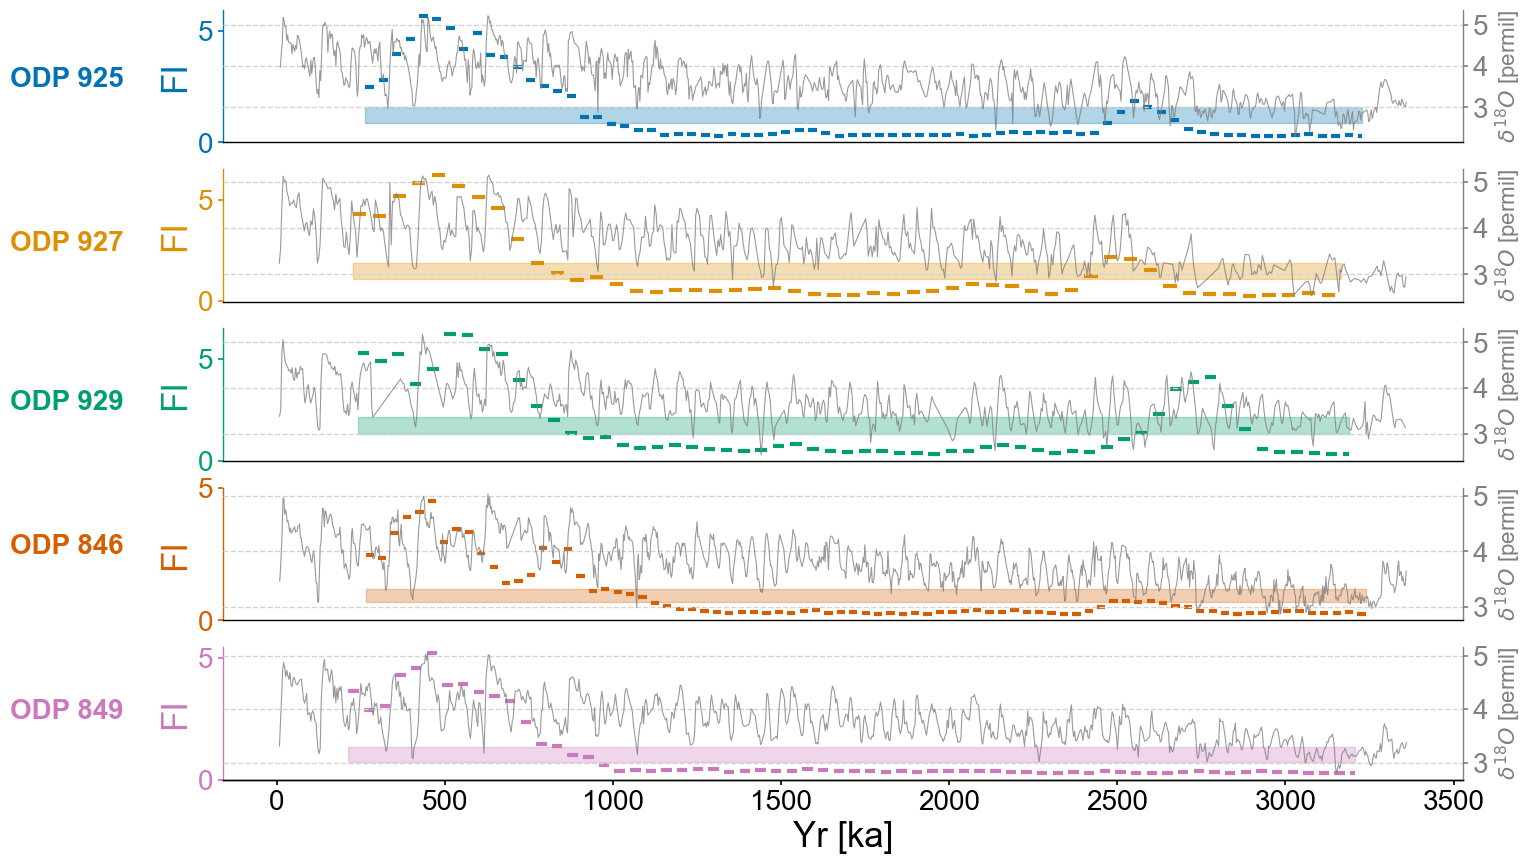

In [5]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig,axes = plt.subplots(nrows=len(group_names),ncols=1,sharex=True,figsize=(16,10))
transition_timing = []

for idx,site in enumerate(group_names):
    ts = lp_fi[site]
    ts.label = lp_series.label
    ts.value_name = 'FI'
    ts.value_unit = None
    ts.time_name = 'Yr'
    ts.time_unit = 'ka'

    ax = axes[idx]
    ts_smooth = ammo.utils.fisher.smooth_series(ts,3)
    upper, lower = ammo.utils.sampling.confidence_interval(ts)

    ts.confidence_smooth_plot(
        ax=ax,
        background_series = ms.series_list[idx],
        transition_interval=(upper,lower),
        block_size=3,
        color=color_list[idx],
        figsize=(12,6),
        legend=True,
        lgd_kwargs={'loc':'upper left'},
        hline_kwargs={'label':None},
        background_kwargs={'ylabel':'$\delta^{18}O$ [permil]','legend':False,'linewidth':.8,'color':'grey','alpha':.8})
    
    trans = transforms.blended_transform_factory(ax.transAxes, ax.transData)
    ax.text(x=-.08, y = 2.5, s = site, horizontalalignment='right', transform=trans, color=color_list[idx], weight='bold',fontsize=20)
        
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_label_position('left')
    ax.yaxis.tick_left()
    ax.get_legend().remove()
    ax.set_title(None)
    ax.grid(visible=False,axis='y')
    if idx != len(group_names)-1:
        ax.set_xlabel(None)
        ax.spines[['bottom']].set_visible(False)
        ax.tick_params(bottom=False)
    ax.xaxis.label.set_fontsize(25)
    ax.yaxis.label.set_fontsize(25)
    ax.set_yticks(ticks=np.array([0,5]))

# LR04 Core MPT Timing (Sliced)

/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_27044/3486955320.py:19: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  series = pyleo.Series(value=d18O,


Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order


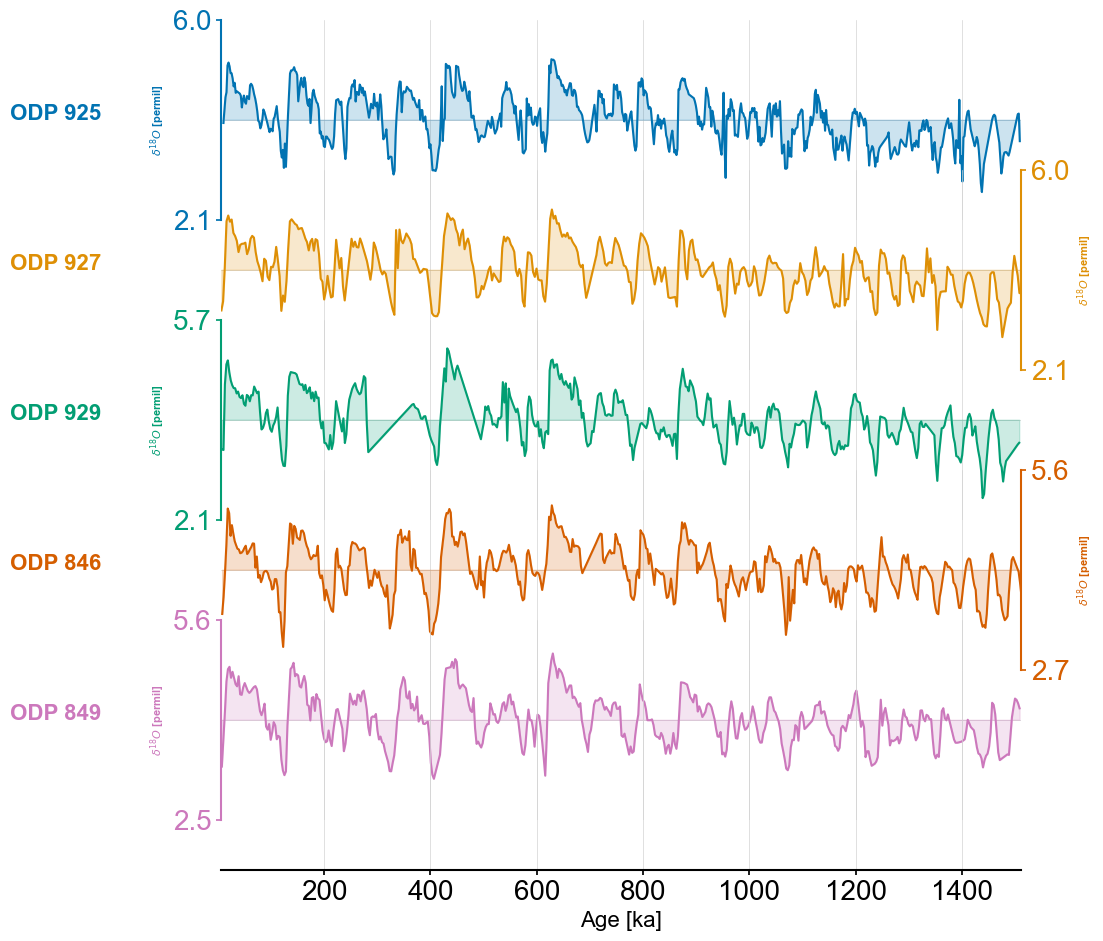

In [6]:
#Defining group lists for easy loading
group_names = ['ODP 925','ODP 927','ODP 929','ODP 846','ODP 849']

series_list = []
color_list = sns.color_palette('colorblind')

for name in group_names:
    with open('./data/LR04cores_spec_corr/'+name[-3:]+'_LR04age.txt','rb') as handle:
        lines = handle.readlines()
        time = []
        d18O = []
        for x in lines:
            line_time = float(format(float(x.decode().split()[1]),'10f'))
            line_d18O = float(format(float(x.decode().split()[2]),'10f'))
            #There is a discontinuity in 927 around 4000 ka, we'll just exclude it
            if line_time <= 4000:
                time.append(line_time)
                d18O.append(line_d18O)
        series = pyleo.Series(value=d18O,
                              time=time,
                              label=name,
                              time_name='Yr',
                              time_unit='ka',
                              value_name=r'$\delta^{18}O$',
                              value_unit='permil')
    series_list.append(series)
    
max_time = max(tsb.time)
min_time = max([min(series.time) for series in series_list])

ms = pyleo.MultipleSeries([series.slice((min_time,max_time)).interp() for series in series_list])
fig,ax = ms.stackplot(colors=color_list[:len(ms.series_list)],figsize=(8,10))

In [7]:
lp_rm = {}
lp_fi = {}

m = 13
tau = 8

for idx,series in enumerate(ms.series_list):
    series = series.convert_time_unit('Years').interp().detrend(method='savitzky-golay')
    amt_series = ammo.Series(
        time=series.time,
        value=series.value,
        time_name = series.time_name,
        value_name = series.value_name,
        time_unit = series.time_unit,
        value_unit = series.value_unit,
        label = series.label,
        clean_ts=False,
        sort_ts=None
    )
    td = amt_series.embed(m=m)
    print(f'{series.label} tau is: {td.tau}')
    eps = td.find_epsilon(eps=1,target_density=.05,tolerance=.01)
    rm = eps['Output']
    lp_series = rm.laplacian_eigenmaps(w_size=50,w_incre=5)
    lp_series = lp_series.convert_time_unit('ka')
    lp_fi[series.label] = lp_series

/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_27044/2294287704.py:9: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  amt_series = ammo.Series(


ODP 925 tau is: 7
Initial density is 0.0094
Initial density is not within the tolerance window, searching...
Epsilon: 1.4062, Density: 0.0689
Epsilon: 1.4062, Density: 0.0689
Epsilon: 1.3119, Density: 0.0444
Epsilon: 1.3119, Density: 0.0444.


/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: No time_name parameter provided. Assuming "Time".
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_27044/2294287704.py:9: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  amt_series = ammo.Series(


ODP 927 tau is: 4
Initial density is 0.0082
Initial density is not within the tolerance window, searching...
Epsilon: 1.4181, Density: 0.0582
Epsilon: 1.4181, Density: 0.0582.


/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: No time_name parameter provided. Assuming "Time".
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_27044/2294287704.py:9: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  amt_series = ammo.Series(


ODP 929 tau is: 5
Initial density is 0.0136
Initial density is not within the tolerance window, searching...
Epsilon: 1.3641, Density: 0.0704
Epsilon: 1.3641, Density: 0.0704
Epsilon: 1.2624, Density: 0.0447
Epsilon: 1.2624, Density: 0.0447.


/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: No time_name parameter provided. Assuming "Time".
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_27044/2294287704.py:9: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  amt_series = ammo.Series(


ODP 846 tau is: 6
Initial density is 0.0306
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0306
Epsilon: 1.0969, Density: 0.0533
Epsilon: 1.0969, Density: 0.0533.


/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: No time_name parameter provided. Assuming "Time".
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_27044/2294287704.py:9: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  amt_series = ammo.Series(


ODP 849 tau is: 4
Initial density is 0.0302
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0302
Epsilon: 1.0991, Density: 0.0525
Epsilon: 1.0991, Density: 0.0525.


/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: No time_name parameter provided. Assuming "Time".
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)


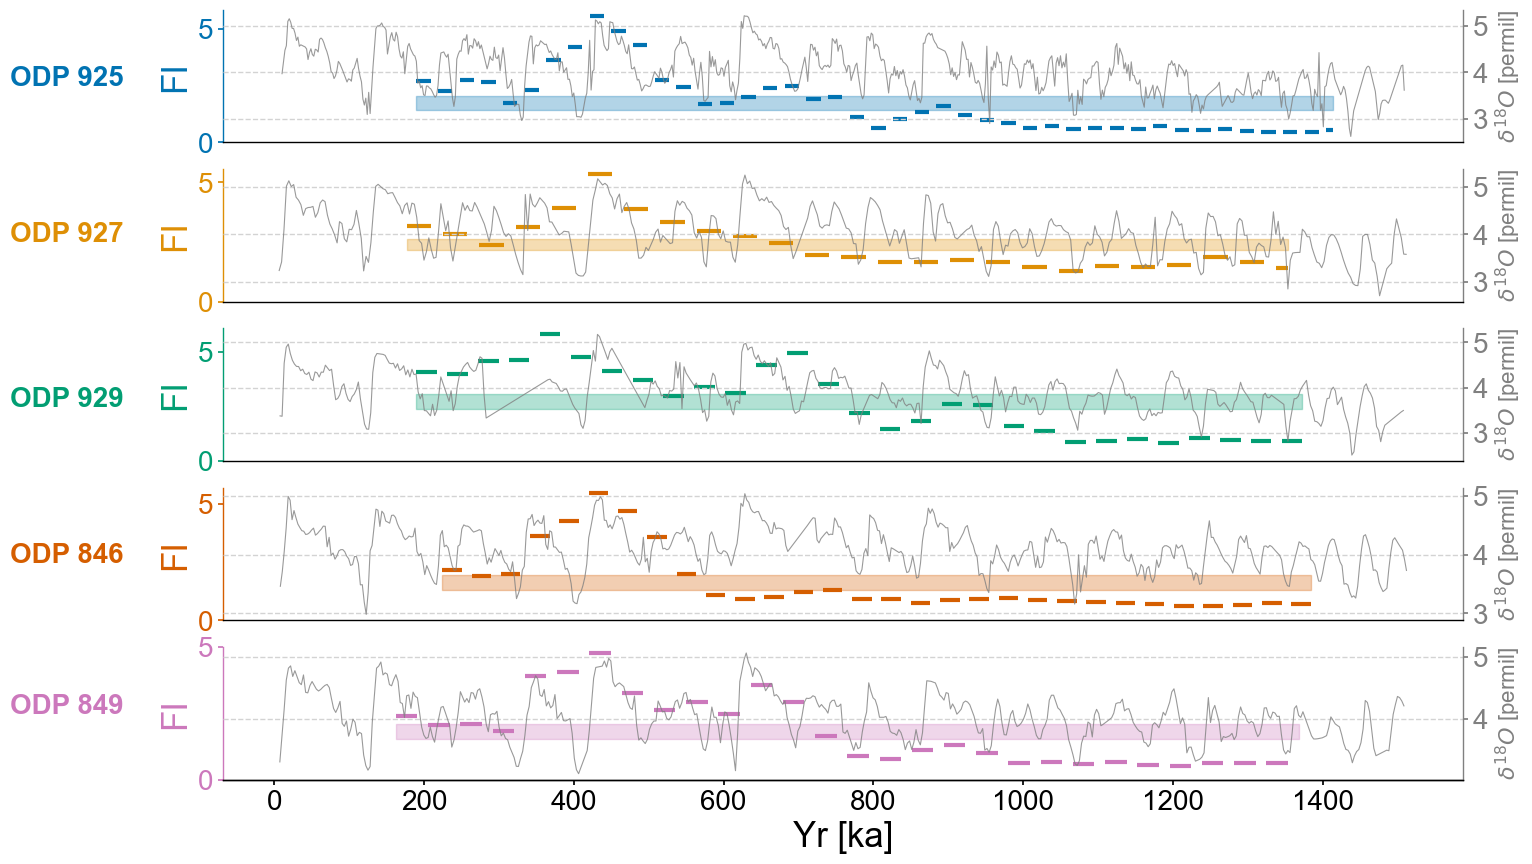

In [8]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig,axes = plt.subplots(nrows=len(group_names),ncols=1,sharex=True,figsize=(16,10))
transition_timing = []

for idx,site in enumerate(group_names):
    ts = lp_fi[site]
    ts.label = lp_series.label
    ts.value_name = 'FI'
    ts.value_unit = None
    ts.time_name = 'Yr'
    ts.time_unit = 'ka'

    ax = axes[idx]
    ts_smooth = ammo.utils.fisher.smooth_series(ts,3)
    upper, lower = ammo.utils.sampling.confidence_interval(ts)

    ts.confidence_smooth_plot(
        ax=ax,
        background_series = ms.series_list[idx],
        transition_interval=(upper,lower),
        block_size=3,
        color=color_list[idx],
        figsize=(12,6),
        legend=True,
        lgd_kwargs={'loc':'upper left'},
        hline_kwargs={'label':None},
        background_kwargs={'ylabel':'$\delta^{18}O$ [permil]','legend':False,'linewidth':.8,'color':'grey','alpha':.8})
    
    trans = transforms.blended_transform_factory(ax.transAxes, ax.transData)
    ax.text(x=-.08, y = 2.5, s = site, horizontalalignment='right', transform=trans, color=color_list[idx], weight='bold',fontsize=20)
        
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_label_position('left')
    ax.yaxis.tick_left()
    ax.get_legend().remove()
    ax.set_title(None)
    ax.grid(visible=False,axis='y')
    if idx != len(group_names)-1:
        ax.set_xlabel(None)
        ax.spines[['bottom']].set_visible(False)
        ax.tick_params(bottom=False)
    ax.xaxis.label.set_fontsize(25)
    ax.yaxis.label.set_fontsize(25)
    ax.set_yticks(ticks=np.array([0,5]))